# Homework Assignment #1

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Section 1: Police Killings

In [14]:
killings = pd.read_csv('../data/police-killings.csv', index_col=[0])
killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### 1. Make the following changes to column names:

- Rename "lawenforcementagency" to "agency"
- Rename "raceethnicity" to "race"

In [15]:
killings.rename(
    columns={
        'lawenforcementagency': 'agency',
        'raceethnicity': 'race'
    }, 
    inplace=True,
)

### 2. Show the count of missing values in each column

In [16]:
killings.isnull().sum()

name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

### 3. Replace each null/missing value in the dataframe with the string "unknown"

In [17]:
killings.fillna(value='unknown', inplace=True)

### 4. How many killings were there in March and April?

In [18]:
killings[killings['month'].isin(['March', 'April'])]['name'].count()

210

### 5. How many male and how many female victims are there?

In [19]:
killings['gender'].value_counts()

Male      445
Female     22
Name: gender, dtype: int64

### 6. How many killings were of unarmed people?

In [20]:
killings['armed'].value_counts()['No']

102

### 7. What percentage of all killings were unarmed?

In [21]:
killings['armed'].value_counts(normalize=True)['No']

0.21841541755888652

### 8. What are the 5 states with the most killings?

In [22]:
killings['state'].value_counts().sort_values(ascending=False).head(5)

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

### 9. Show a value counts of deaths for each race

In [23]:
killings['race'].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

### 10. Display a histogram of ages of all killings

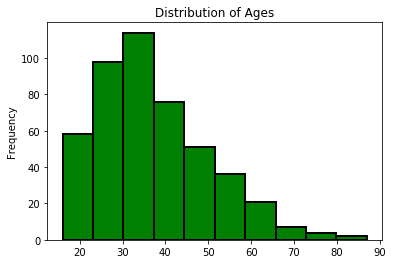

In [24]:
killings['age'].plot(
    kind='hist', 
    figsize=(6,4),
    color='green',
    ec='black',
    linewidth=2.0,
    title='Distribution of Ages',
)

### 11. Show histogram of ages for each race

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110a9d090>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1158a8350>]], dtype=object)

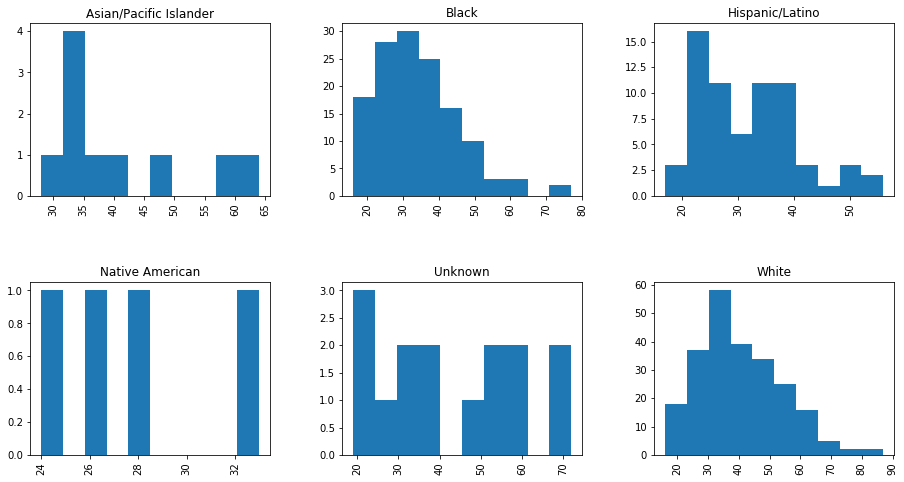

In [25]:
killings['age'].hist(
    by=killings['race'], 
    figsize=(15,8),
    bins=10,
    layout=(2,3),
)

### 12. What is the average age of death by race?

In [26]:
killings.groupby('race')['age'].mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

### 13. Show a bar chart with counts of deaths every month

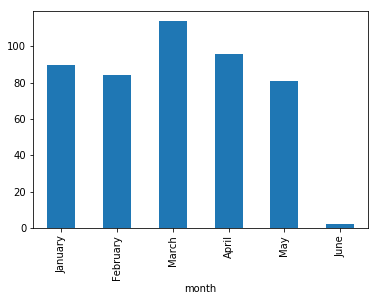

In [27]:
months = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6}
killings['month_number'] = killings['month'].map(months)

killings.groupby(['month', 'month_number'])['name'].count().sort_index(level=1).reset_index(level=1, drop=True).plot(kind='bar')

## Section 2: College Majors

In [28]:
majors = pd.read_csv('../data/college-majors.csv', index_col=[0])
majors.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


### 1. Delete the columns (employed_full_time_year_round, major_code)


In [29]:
majors.drop(['Employed_full_time_year_round', 'Major_code'], axis=1, inplace=True)

### 2. Show the count of missing values in each column

In [30]:
majors.isnull().sum()

Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

### 3. What are the top 10 highest paying majors?

In [31]:
majors.sort_values(by='Median', ascending=False)['Major'].head(10)

59                                 PETROLEUM ENGINEERING
154    PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...
57             NAVAL ARCHITECTURE AND MARINE ENGINEERING
55                             METALLURGICAL ENGINEERING
58                                   NUCLEAR ENGINEERING
56                        MINING AND MINERAL ENGINEERING
97                      MATHEMATICS AND COMPUTER SCIENCE
48                                ELECTRICAL ENGINEERING
45                                  CHEMICAL ENGINEERING
51                GEOLOGICAL AND GEOPHYSICAL ENGINEERING
Name: Major, dtype: object

### 4. Plot the data from the last question in a bar chart, include proper title, and labels


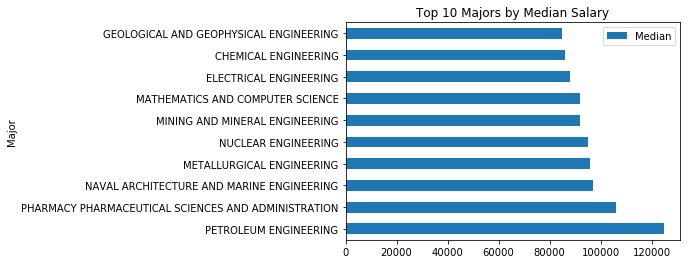

In [32]:
majors.sort_values(by='Median', ascending=False).head(10).plot(
    x='Major', 
    y='Median', 
    kind='barh', 
    title='Top 10 Majors by Median Salary',
)

### 5. What is the average median salary for each major category?

In [33]:
majors.groupby('Major_category')['Median'].mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

### 6. Visualize only the top 5 paying major categories

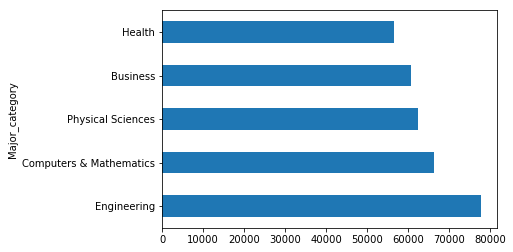

In [34]:
majors.groupby('Major_category')['Median'].mean().sort_values(ascending=False).head().plot(kind='barh')

### 7. Plot a histogram of the distribution of median salaries

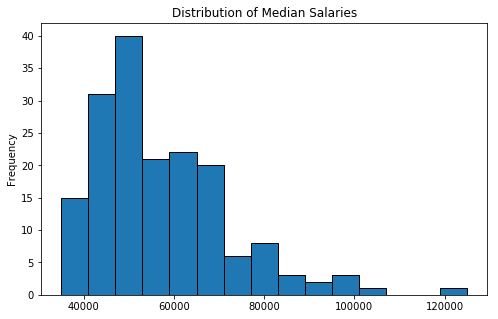

In [35]:
majors['Median'].plot(kind='hist', figsize=(8,5), bins=15, ec='black', title='Distribution of Median Salaries')

### 8. Plot a histogram of the distribution of median salaries by major category

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116591d50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116de8a50>]], dtype=object)

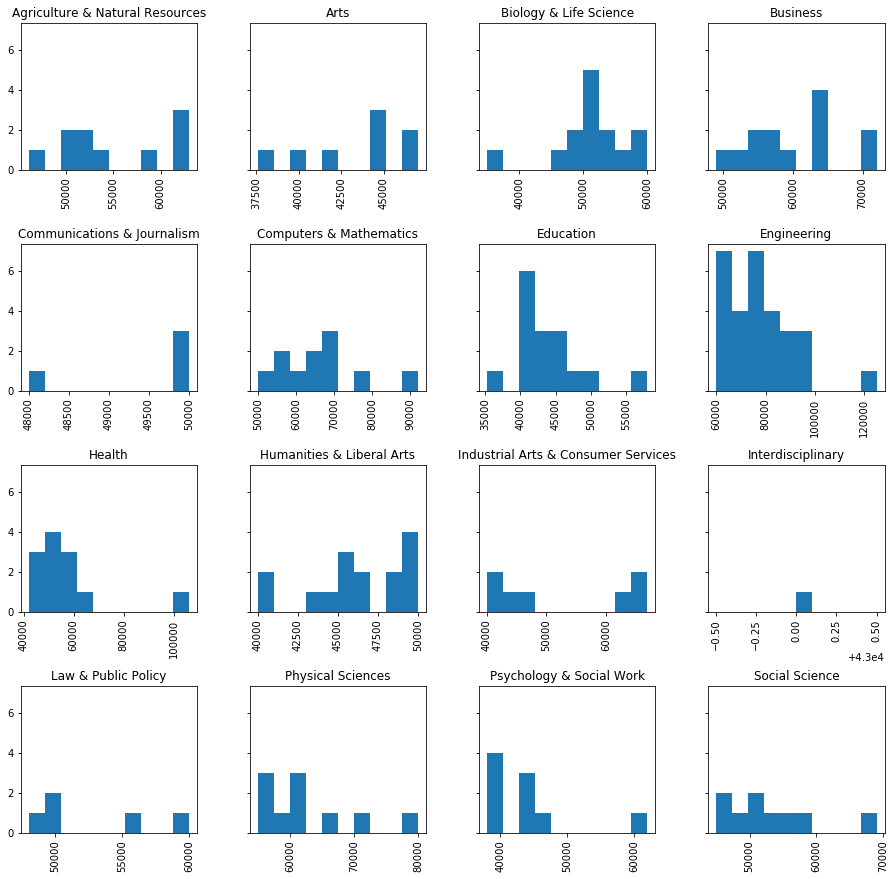

In [36]:
majors.hist('Median', by='Major_category', figsize=(15,15), bins=10, sharey=True)

### 9. What are the top 10 most UNemployed majors?

In [37]:
majors.sort_values(by='Unemployed', ascending=False)['Major'].head(10)

161    BUSINESS MANAGEMENT AND ADMINISTRATION
158                          GENERAL BUSINESS
114                                PSYCHOLOGY
159                                ACCOUNTING
13                             COMMUNICATIONS
73            ENGLISH LANGUAGE AND LITERATURE
164          MARKETING AND MARKETING RESEARCH
132          POLITICAL SCIENCE AND GOVERNMENT
25                          GENERAL EDUCATION
78                                    BIOLOGY
Name: Major, dtype: object

### 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

In [38]:
majors.groupby('Major_category')['Unemployed'].mean().sort_values(ascending=False).head(10)

Major_category
Business                       33415.153846
Communications & Journalism    25299.750000
Social Science                 14683.333333
Arts                           13015.625000
Humanities & Liberal Arts      11942.400000
Psychology & Social Work       11578.444444
Law & Public Policy             8609.800000
Education                       7833.500000
Computers & Mathematics         7270.363636
Health                          6251.083333
Name: Unemployed, dtype: float64

## Section 3: FIFA Soccer Game data

In [39]:
fifa = pd.read_csv('../data/fifa_data.csv')
fifa.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


### 1. Clean up the dataset.

    - Lowercase the column names
    - Set the "name" column as the index
    - Drop the following columns "national_position", "national_kit", "club_kit", "club_joining", and "contract_expiry"
    - Get rid of all players who are goalkeepers and drop every column that starts with GK
    - Drop every player whose rating is less than 70
    - Convert the "height" and "weight" columns to float types
    - Check to see if there any nulls, if so drop them from the dataset

In [40]:
fifa.columns = fifa.columns.str.lower()
fifa.set_index('name', inplace=True)
fifa.drop(['national_position', 'national_kit', 'club_kit', 'club_joining', 'contract_expiry'], axis=1, inplace=True)
fifa = fifa[fifa['club_position'] != 'GK']
fifa.drop(fifa.columns[fifa.columns.str.contains('^gk.*')], axis=1, inplace=True)
fifa = fifa[fifa.rating >= 70]
fifa['height'] = pd.to_numeric(fifa['height'].str.replace('cm', ''))
fifa['weight'] = pd.to_numeric(fifa['weight'].str.replace('kg', ''))
fifa.dropna(inplace=True)

### 2.  Who are the top five players of the following attributes: speed, marking, and finishing

In [41]:
print fifa['speed'].sort_values(ascending=False).head(5)
print '\n'
print fifa['marking'].sort_values(ascending=False).head(5)
print '\n'
print fifa['finishing'].sort_values(ascending=False).head(5)

name
Jonathan Biabiany            96
Pierre-Emerick Aubameyang    96
Gareth Bale                  95
Ernest Asante                95
Williams                     95
Name: speed, dtype: int64


name
Giorgio Chiellini    92
Thiago Silva         90
Jérôme Boateng       90
Andrea Barzagli      90
Miranda              89
Name: marking, dtype: int64


name
Lionel Messi          95
Luis Suárez           94
Cristiano Ronaldo     93
Gonzalo Higuaín       92
Robert Lewandowski    91
Name: finishing, dtype: int64


### 3. Who is the tallest French lefted foot player?

In [42]:
fifa[(fifa['preffered_foot'] == 'Left') & (fifa['nationality'] == 'France')]['height'].sort_values(ascending=False).head(1)

name
Romain Thomas    193
Name: height, dtype: int64

### 4. Show a pandas series of every attribute's correlation with the rating attribute

In [43]:
fifa.corr()['rating']

rating                1.000000
height                0.031355
weight                0.037766
age                   0.043735
weak_foot             0.128486
skill_moves           0.197929
ball_control          0.324058
dribbling             0.247239
marking               0.067274
sliding_tackle        0.091544
standing_tackle       0.107487
aggression            0.156163
reactions             0.690226
attacking_position    0.220396
interceptions         0.126365
vision                0.306819
composure             0.436876
crossing              0.209043
short_pass            0.367006
long_pass             0.307635
acceleration          0.128840
speed                 0.130594
stamina               0.175219
strength              0.105597
balance               0.081555
agility               0.145819
jumping               0.107216
heading               0.173646
shot_power            0.248798
finishing             0.213504
long_shots            0.228673
curve                 0.241254
freekick

### 5. Make a heatmap of the dataset's correlation table

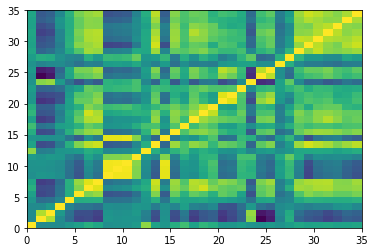

In [44]:
plt.pcolor(fifa.corr())

### 6. Return a dataframe with only players from the following clubs. Call the dataframe fifa2. From now on we'll be using fifa2

In [45]:
clubs_list = ['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd',
              'Chelsea', 'Arsenal', 'Juventus', 'PSG', 'Manchester City',
              'Bor. Dortmund', 'Liverpool', 'Roma']

In [46]:
fifa2 = fifa[fifa.club.isin(clubs_list)]

### 7. Make a bar plot of the average long_shots, curve, and dribbling attributes of the clubs in the data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117092490>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x111c5c8d0>], dtype=object)

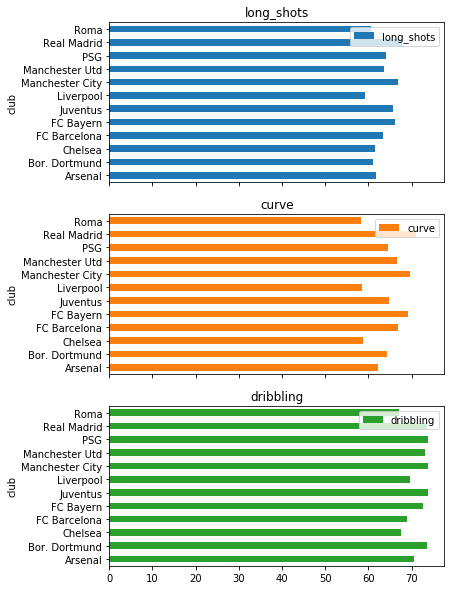

In [47]:
fifa2.groupby('club')[['long_shots', 'curve', 'dribbling']].mean().plot(kind='barh', subplots=True, figsize=(6,10))

### 8. Make a scatter plot of short_pass vs marking and use the preffered_foot column to color-encode the dots.

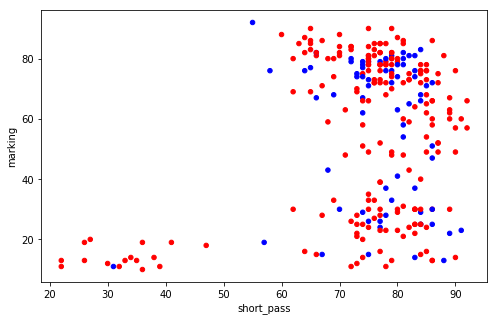

In [48]:
colors = fifa2.preffered_foot.map({'Left': 'blue', 'Right': 'red'})
fifa2.plot(x='short_pass', y='marking', kind='scatter', c=colors, figsize=(8,5))